# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [14]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization
#you should install fbprophet but in my mac book it is not working so I am installing prophet both work same just different names are there
!pip install pandas prophet plotly

In [15]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [16]:
 #if you dont use gpu then you will get warning to shift but dont shift
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [4]:
df = pd.read_csv('TSLA1.csv')

In [17]:
#read_csv function from pandas
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600
1,2023-02-22,197.929993,201.990005,191.779999,200.860001,200.860001,191828500
2,2023-02-23,203.910004,205.139999,196.330002,202.070007,202.070007,146360000
3,2023-02-24,196.330002,197.669998,192.800003,196.880005,196.880005,142228100
4,2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300
...,...,...,...,...,...,...,...
245,2024-02-12,192.110001,194.729996,187.279999,188.130005,188.130005,95498600
246,2024-02-13,183.990005,187.259995,182.110001,184.020004,184.020004,86759500
247,2024-02-14,185.300003,188.889999,183.350006,188.710007,188.710007,81203000
248,2024-02-15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [21]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,223.577681,227.789040,219.212080,223.653280,223.653280,1.254417e+08
std,34.407451,34.804558,33.932966,34.321716,34.321716,2.618605e+07
min,152.639999,160.479996,152.369995,153.750000,153.750000,6.512520e+07
25%,191.447502,194.869995,187.469998,191.259995,191.259995,1.066075e+08
50%,230.940002,236.300003,227.359993,233.075004,233.075004,1.208417e+08
75%,251.787495,257.992500,247.394993,253.019993,253.019993,1.403374e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [24]:
#analyzing price of data using plotly libraries area function
px.area(df,x="Date",y="Close")

In [25]:
px.line(df,x= "Date",y="Close")

In [26]:
px.area(df,x="Date",y="Volume")

In [40]:
px.bar(df,x="Date",y="Volume")

In [37]:
df["Volume"].describe()

count    2.500000e+02
mean     1.254417e+08
std      2.618605e+07
min      6.512520e+07
25%      1.066075e+08
50%      1.208417e+08
75%      1.403374e+08
max      2.117971e+08
Name: Volume, dtype: float64

In [39]:
px.box(df,y="Volume")

# Understanding Facebook Prophet

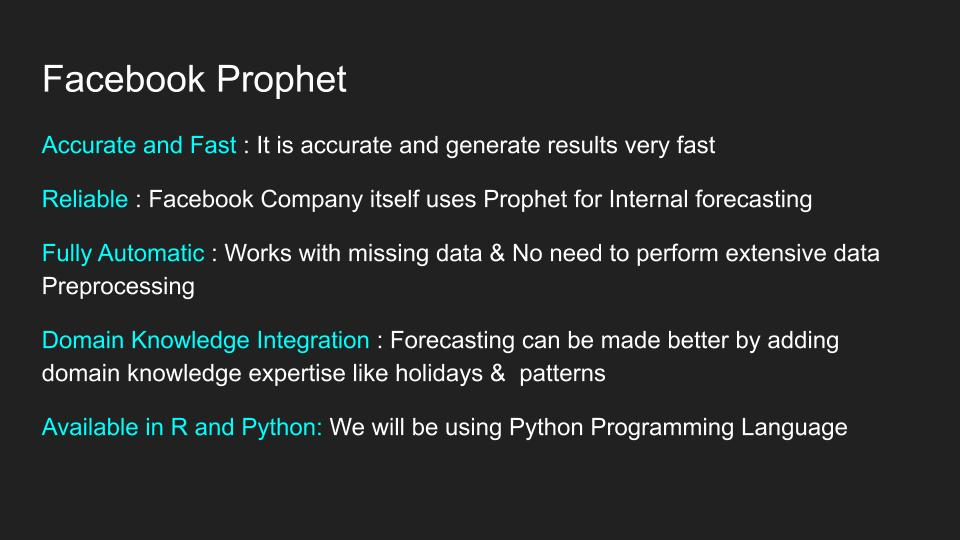

## Data Preperation

In [41]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600
1,2023-02-22,197.929993,201.990005,191.779999,200.860001,200.860001,191828500
2,2023-02-23,203.910004,205.139999,196.330002,202.070007,202.070007,146360000
3,2023-02-24,196.330002,197.669998,192.800003,196.880005,196.880005,142228100
4,2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300
...,...,...,...,...,...,...,...
245,2024-02-12,192.110001,194.729996,187.279999,188.130005,188.130005,95498600
246,2024-02-13,183.990005,187.259995,182.110001,184.020004,184.020004,86759500
247,2024-02-14,185.300003,188.889999,183.350006,188.710007,188.710007,81203000
248,2024-02-15,189.160004,200.880005,188.860001,200.449997,200.449997,120831800


In [43]:
# we need to work on some columns only
columns = ['Date',"Close"]
ndf = pd.DataFrame(df,columns= columns)
ndf

,Date,Close
0,2023-02-21,197.369995
1,2023-02-22,200.860001
2,2023-02-23,202.070007
3,2023-02-24,196.880005
4,2023-02-27,207.630005
...,...,...
245,2024-02-12,188.130005
246,2024-02-13,184.020004
247,2024-02-14,188.710007
248,2024-02-15,200.449997


In [44]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [45]:
prophet_df

,ds,y
0,2023-02-21,197.369995
1,2023-02-22,200.860001
2,2023-02-23,202.070007
3,2023-02-24,196.880005
4,2023-02-27,207.630005
...,...,...
245,2024-02-12,188.130005
246,2024-02-13,184.020004
247,2024-02-14,188.710007
248,2024-02-15,200.449997


## Creating Facebook Prophet Model

In [46]:
m = Prophet()
#we will load our dataframe into the model
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0em4gj27/bpgahxtb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0em4gj27/pvm_rpcc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79879', 'data', 'file=/tmp/tmp0em4gj27/bpgahxtb.json', 'init=/tmp/tmp0em4gj27/pvm_rpcc.json', 'output', 'file=/tmp/tmp0em4gj27/prophet_model380dvywl/prophet_model-20240218084209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:42:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:42:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [51]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [52]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-02-21,184.267972,160.863351,205.499319,184.267972,184.267972,-0.724671,-0.724671,-0.724671,-0.724671,-0.724671,-0.724671,0.0,0.0,0.0,183.543301
1,2023-02-22,184.338002,158.210985,207.380003,184.338002,184.338002,-1.680283,-1.680283,-1.680283,-1.680283,-1.680283,-1.680283,0.0,0.0,0.0,182.657719
2,2023-02-23,184.408032,156.772512,204.306262,184.408032,184.408032,-3.339952,-3.339952,-3.339952,-3.339952,-3.339952,-3.339952,0.0,0.0,0.0,181.068080
3,2023-02-24,184.478062,157.926310,205.282608,184.478062,184.478062,-3.140213,-3.140213,-3.140213,-3.140213,-3.140213,-3.140213,0.0,0.0,0.0,181.337849
4,2023-02-27,184.688152,158.237340,205.525513,184.688152,184.688152,-3.558934,-3.558934,-3.558934,-3.558934,-3.558934,-3.558934,0.0,0.0,0.0,181.129218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2024-03-13,195.500243,169.381951,217.482367,192.925604,198.242060,-1.680283,-1.680283,-1.680283,-1.680283,-1.680283,-1.680283,0.0,0.0,0.0,193.819959
276,2024-03-14,195.106176,166.525154,216.072469,192.331259,197.999662,-3.339952,-3.339952,-3.339952,-3.339952,-3.339952,-3.339952,0.0,0.0,0.0,191.766224
277,2024-03-15,194.712109,168.198543,216.414657,191.736984,197.804228,-3.140213,-3.140213,-3.140213,-3.140213,-3.140213,-3.140213,0.0,0.0,0.0,191.571896
278,2024-03-16,194.318043,175.994252,222.541089,191.107110,197.622892,6.222026,6.222026,6.222026,6.222026,6.222026,6.222026,0.0,0.0,0.0,200.540068


In [53]:
px.line(forecast,x="ds",y="yhat")

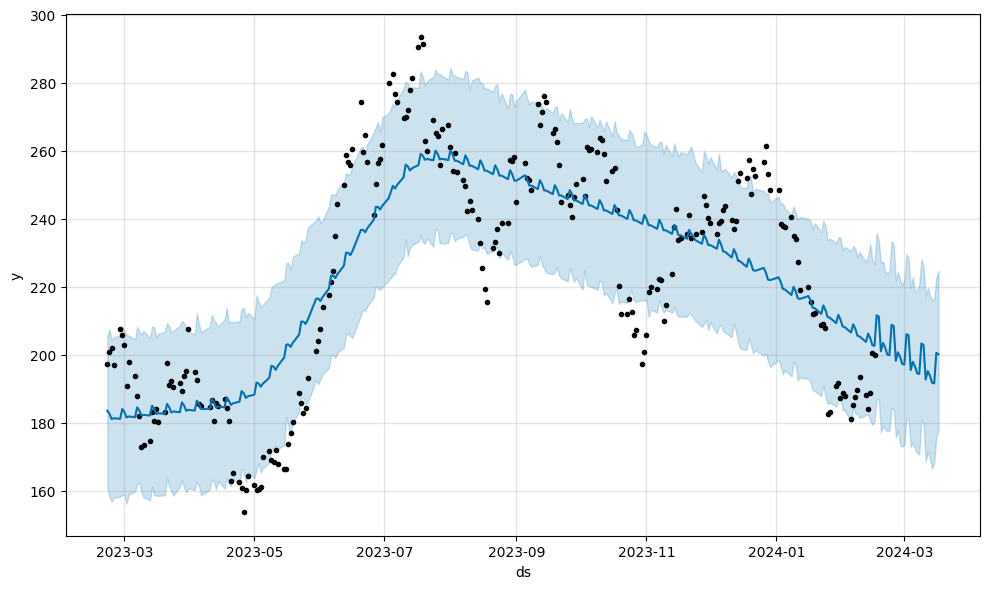

In [55]:
figure = m.plot(forecast,xlabel='ds',ylabel="y")

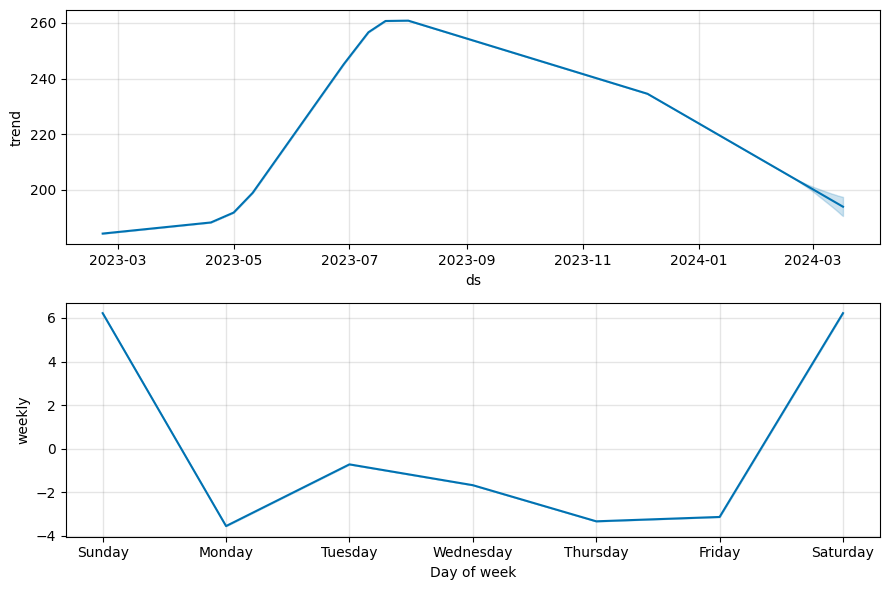

In [54]:
figure2 = m.plot_components(forecast)
figure3 = m.

##Downloading the Forecast data

In [57]:
from google.colab import files
forecast.to_csv('yashForecast.csv')
files.download('yashForecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>